In [2]:
import os
import platform
from IPython.display import clear_output
print(platform.platform())

def resolve_dir(Dir):
    if not os.path.exists(Dir):
        os.mkdir(Dir)

def reset_path(Dir):
    if not os.path.exists(Dir):
        os.mkdir(Dir)
    else:
        os.system('rm -f {}/*'.format( Dir))

Windows-10-10.0.22631-SP0


In [3]:
import tensorflow as tf
tf.random.set_seed(73)
TPU_INIT = False

if TPU_INIT:
    try:
        tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
        tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
    
    except ValueError:
        raise BaseException('ERROR: Not connected to a TPU runtime!')
else:
    !nvidia-smi
;    
print("Tensorflow version " + tf.__version__)


Tensorflow version 2.15.1


'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
MyDrive = '/kaggle/working'
PROJECT_DIR = '/content/drive/MyDrive/archive (2)'

In [5]:

import cv2
import os
import imageio
import imgaug.augmenters as iaa
import imgaug as ia

IMG_SIZE = 128
ColorChannels = 3

def video_to_frames(video):
    vidcap = cv2.VideoCapture(video)

    import math
    rate = math.floor(vidcap.get(3))
    count = 0

    ImageFrames = []
    while vidcap.isOpened():
        ID = vidcap.get(1)
        success, image = vidcap.read()

        if success:
            # skipping frames to avoid duplications
            if (ID % 7 == 0):
                flip = iaa.Fliplr(1.0)
                zoom = iaa.Affine(scale=1.3)
                random_brightness = iaa.Multiply((1, 1.3))
                rotate = iaa.Affine(rotate=(-25, 25))

                image_aug = flip(image = image)
                image_aug = random_brightness(image = image_aug)
                image_aug = zoom(image = image_aug)
                image_aug = rotate(image = image_aug)

                rgb_img = cv2.cvtColor(image_aug, cv2.COLOR_BGR2RGB)
                resized = cv2.resize(rgb_img, (IMG_SIZE, IMG_SIZE))
                ImageFrames.append(resized)

            count += 1
        else:
            break

    vidcap.release()

    return ImageFrames

In [6]:
!pip install opencv-python

!pip install imageio


In [7]:
!pip install imgaug


In [8]:
import cv2
import os  # Built-in, no installation required
import imageio
import imgaug.augmenters as iaa
import imgaug as ia


In [9]:

import cv2
import os
import imageio
import imgaug.augmenters as iaa
import imgaug as ia

IMG_SIZE = 128
ColorChannels = 3

def video_to_frames(video):
    vidcap = cv2.VideoCapture(video)

    import math
    rate = math.floor(vidcap.get(3))
    count = 0

    ImageFrames = []
    while vidcap.isOpened():
        ID = vidcap.get(1)
        success, image = vidcap.read()

        if success:
            # skipping frames to avoid duplications
            if (ID % 7 == 0):
                flip = iaa.Fliplr(1.0)
                zoom = iaa.Affine(scale=1.3)
                random_brightness = iaa.Multiply((1, 1.3))
                rotate = iaa.Affine(rotate=(-25, 25))

                image_aug = flip(image = image)
                image_aug = random_brightness(image = image_aug)
                image_aug = zoom(image = image_aug)
                image_aug = rotate(image = image_aug)

                rgb_img = cv2.cvtColor(image_aug, cv2.COLOR_BGR2RGB)
                resized = cv2.resize(rgb_img, (IMG_SIZE, IMG_SIZE))
                ImageFrames.append(resized)

            count += 1
        else:
            break

    vidcap.release()

    return ImageFrames

In [10]:
import cv2
import os

# Set the path to your video dataset directory
video_dir = 'C:\\Users\\aksha\\Downloads\\archive (2)\\Real Life Violence Dataset'

# List all files in the directory
for video_file in os.listdir(video_dir):
    # Full path to the video file
    video_path = os.path.join(video_dir, video_file)

    # Check if the file is a video
    if video_file.endswith(".mp4"):
        # Capture the video
        cap = cv2.VideoCapture(video_path)

        # Loop through the frames of the video
        while cap.isOpened():
            ret, frame = cap.read()
            if ret:
                # Display the frame
                cv2.imshow('Video Frame', frame)

                # Exit when 'q' is pressed
                if cv2.waitKey(25) & 0xFF == ord('q'):
                    break
            else:
                break
        
        # Release the capture and close windows
        cap.release()
        cv2.destroyAllWindows()



In [11]:
%%time
from tqdm import tqdm



print('we have \n{} Violence videos \n{} NonViolence videos'.format(
              len(os.listdir(video_dir + '/Violence')),
              len(os.listdir(video_dir + '/NonViolence'))))

X_original = []
y_original = []

print('i choose 700 videos out of 2000, cuz of memory issue')
CLASSES = ["NonViolence", "Violence"]
#700 <- 350 + 350

for category in os.listdir(video_dir):
    path = os.path.join(video_dir, category)
    class_num = CLASSES.index(category)
    for i, video in enumerate(tqdm(os.listdir(path)[0:350])):
        frames = video_to_frames(path + '/' + video)
        for j, frame in enumerate(frames):
            X_original.append(frame)
            y_original.append(class_num)

we have 
1003 Violence videos 
1000 NonViolence videos
i choose 700 videos out of 2000, cuz of memory issue


100%|██████████| 350/350 [04:37<00:00,  1.26it/s]

CPU times: total: 5min 10s
Wall time: 8min 26s


In [12]:
import numpy as np
X_original = np.array(X_original).reshape(-1 , IMG_SIZE * IMG_SIZE * 3)
y_original = np.array(y_original)
len(X_original)

13927

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

stratified_sample = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=73)

for train_index, test_index in stratified_sample.split(X_original, y_original):
    X_train, X_test = X_original[train_index], X_original[test_index]
    y_train, y_test = y_original[train_index], y_original[test_index]

X_train_nn = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 3) / 255
X_test_nn = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 3) / 255


In [14]:
!pip install imutils
clear_output()

In [15]:
!pip install keras


In [16]:
import cv2
import os
import numpy as np
import pickle
import matplotlib
matplotlib.use("Agg")

from tensorflow.keras.layers import Input, Dropout, Flatten, Dense
from tensorflow.keras.models import Model




import matplotlib.pyplot as plt

In [17]:

epochs = 50

from keras import regularizers
kernel_regularizer = regularizers.l2(0.0001)

from keras.applications.mobilenet_v2 import MobileNetV2

def load_layers():
    input_tensor = Input(shape=(IMG_SIZE, IMG_SIZE, ColorChannels))
    baseModel = MobileNetV2(pooling='avg',
                            include_top=False, 
                            input_tensor=input_tensor)
    
    headModel = baseModel.output   
    headModel = Dense(1, activation="sigmoid")(headModel)
    model = Model(inputs=baseModel.input, outputs=headModel)

    for layer in baseModel.layers:
        layer.trainable = False

    print("Compiling model...")
    model.compile(loss="binary_crossentropy",
                    optimizer='adam',
                    metrics=["accuracy"])

    return model

if TPU_INIT:
    with tpu_strategy.scope():
        model = load_layers()
else:
    model = load_layers()

model.summary()



Compiling model...

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 64, 64, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 64, 64, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 64, 64, 32)           0         ['bn

In [18]:

from tensorflow.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping, ReduceLROnPlateau

patience = 3

start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005

batch_size = 4

if TPU_INIT:
    max_lr = max_lr * tpu_strategy.num_replicas_in_sync
    batch_size = batch_size * tpu_strategy.num_replicas_in_sync

rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr


class myCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if ((logs.get('accuracy')>=0.999)):
            print("\nLimits Reached cancelling training!")
            self.model.stop_training = True

In [19]:

end_callback = myCallback()
lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=False)

early_stopping = EarlyStopping(patience = patience, monitor='val_loss',
                                 mode='min', restore_best_weights=True, 
                                 verbose = 1, min_delta = .00075)

PROJECT_DIR =  '/RiskDetection'

lr_plat = ReduceLROnPlateau(patience = 2, mode = 'min')

os.system('rm -rf ./logs/')

import datetime
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir = log_dir, write_graph=True, histogram_freq=1)

checkpoint_filepath = 'ModelWeights.h5'

model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                        save_weights_only=True,
                                        monitor='val_loss',
                                        mode='min',
                                        verbose = 1,
                                        save_best_only=True)


callbacks = [end_callback, lr_callback, model_checkpoints, tensorboard_callback, early_stopping, lr_plat]

if TPU_INIT:
    callbacks = [end_callback, lr_callback, model_checkpoints, early_stopping, lr_plat]

In [20]:
print('Training head...')
#model.load_weights('./Model_Weights.h5')

history = model.fit(X_train_nn ,y_train, epochs=epochs,
                        callbacks=callbacks,
                        validation_data = (X_test_nn, y_test),
                        batch_size=batch_size)

print('\nRestoring best Weights for MobileNetV2')
model.load_weights(checkpoint_filepath)

Training head...
Epoch 1/50


2437/2437 [==============================] - ETA: 0s - loss: 0.6970 - accuracy: 0.6223
Epoch 1: val_loss improved from inf to 0.59625, saving model to ModelWeights.h5
2437/2437 [==============================] - 248s 99ms/step - loss: 0.6970 - accuracy: 0.6223 - val_loss: 0.5963 - val_accuracy: 0.6959 - lr: 1.0000e-05
Epoch 2/50
2437/2437 [==============================] - ETA: 0s - loss: 0.4974 - accuracy: 0.7649
Epoch 2: val_loss improved from 0.59625 to 0.42073, saving model to ModelWeights.h5
2437/2437 [==============================] - 276s 113ms/step - loss: 0.4974 - accuracy: 0.7649 - val_loss: 0.4207 - val_accuracy: 0.8222 - lr: 1.8000e-05
Epoch 3/50
2436/2437 [============================>.] - ETA: 0s - loss: 0.3681 - accuracy: 0.8448
Epoch 3: val_loss improved from 0.42073 to 0.32563, saving model to ModelWeights.h5
2437/2437 [==============================] - 157s 65ms/step - loss: 0.3680 - accuracy: 0.8449 - val_loss: 0.3256 - val_accuracy: 0.8

In [21]:
%matplotlib inline

def print_graph(item, index, history):
    plt.figure()
    train_values = history.history[item][0:index]
    plt.plot(train_values)
    test_values = history.history['val_' + item][0:index]
    plt.plot(test_values)
    plt.legend(['training','validation'])
    plt.title('Training and validation '+ item)
    plt.xlabel('epoch')
    plt.show()
    plot = '{}.png'.format(item)
    plt.savefig(plot)


def get_best_epoch(test_loss, history):
    for key, item in enumerate(history.history.items()):
        (name, arr) = item
        if name == 'val_loss':
            for i in range(len(arr)):
                if round(test_loss, 2) == round(arr[i], 2):
                    return i
                
def model_summary(model, history):
    print('---'*30)
    test_loss, test_accuracy = model.evaluate(X_test_nn, y_test, verbose=0)

    if history:
        index = get_best_epoch(test_loss, history)
        print('Best Epochs: ', index)

        train_accuracy = history.history['accuracy'][index]
        train_loss = history.history['loss'][index]

        print('Accuracy on train:',train_accuracy,'\tLoss on train:',train_loss)
        print('Accuracy on test:',test_accuracy,'\tLoss on test:',test_loss)
        print_graph('loss', index, history)
        print_graph('accuracy', index, history)
        print('---'*30)   

------------------------------------------------------------------------------------------
Best Epochs:  37
Accuracy on train: 0.9524005055427551 	Loss on train: 0.13292911648750305
Accuracy on test: 0.9521416425704956 	Loss on test: 0.13929148018360138


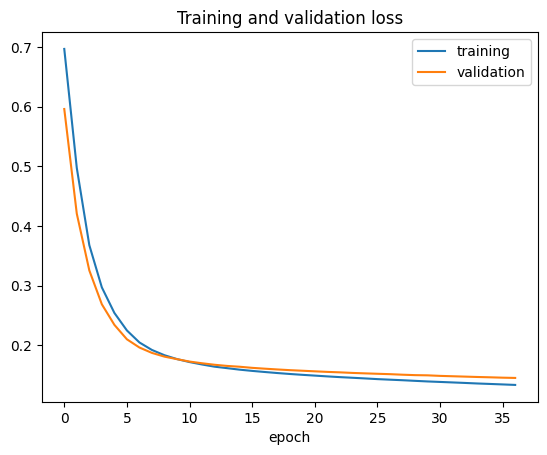

<Figure size 640x480 with 0 Axes>

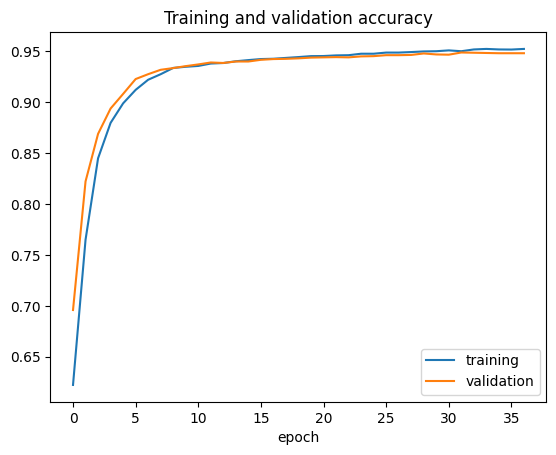

------------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

In [22]:
model_summary(model, history)


In [23]:
print("Evaluating network...")
predictions = model.predict(X_test_nn)
preds = predictions > 0.5

Evaluating network...
131/131 [==============================] - 31s 224ms/step


> Correct Predictions: 3979
> Wrong Predictions: 200


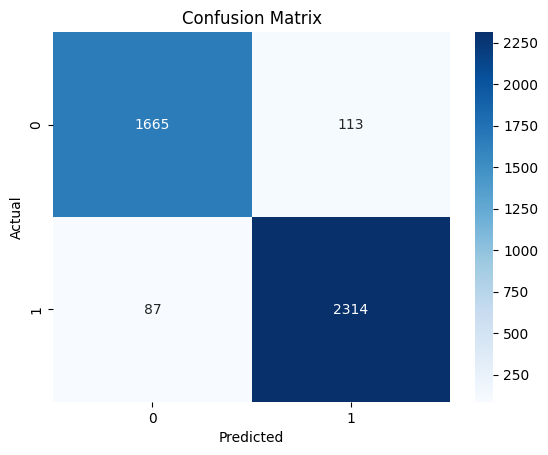

              precision    recall  f1-score   support

 NonViolence       0.95      0.94      0.94      1778
    Violence       0.95      0.96      0.96      2401

    accuracy                           0.95      4179
   macro avg       0.95      0.95      0.95      4179
weighted avg       0.95      0.95      0.95      4179



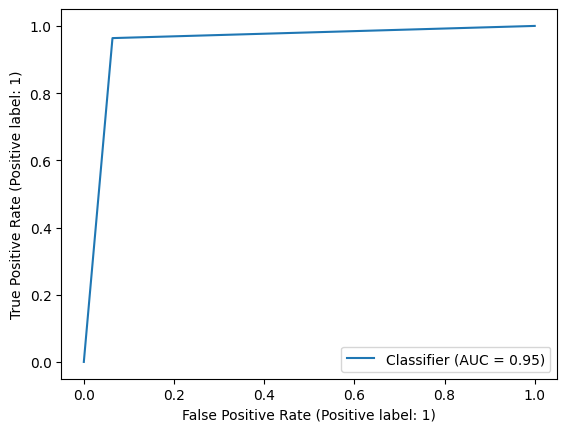

In [24]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay, accuracy_score, classification_report, confusion_matrix

# Confusion matrix
corr_pred = metrics.confusion_matrix(y_test, preds)

# Calculate number of correct predictions
n_correct = int((corr_pred[0][0] + corr_pred[1][1]))
print('> Correct Predictions:', n_correct)

# Calculate number of wrong predictions
n_wrongs = int((corr_pred[0][1] + corr_pred[1][0]))
print('> Wrong Predictions:', n_wrongs)

# Plot confusion matrix heatmap
sns.heatmap(corr_pred, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Print classification report
print(metrics.classification_report(y_test, preds, 
                           target_names=["NonViolence", "Violence"]))

# Plot ROC curve (use RocCurveDisplay in place of deprecated plot_roc_curve)
RocCurveDisplay.from_predictions(y_test, preds)
plt.show()


In [25]:
args_model = "ModelWeights.h5"
model.save(args_model)

c:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
from keras.models import load_model
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import argparse
import pickle
import cv2

In [55]:
pip show tensorflow


Name: tensorflowNote: you may need to restart the kernel to use updated packages.

Version: 2.15.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\aksha\appdata\local\programs\python\python310\lib\site-packages
Requires: tensorflow-intel
Required-by: tf_keras


In [56]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import os
import cv2
import time
import argparse
import pickle

from tensorflow.keras.models import load_model

from collections import deque

def print_results(video, limit=None):
    # Check if the output directory exists, if not, create it
    if not os.path.exists('output'):
        os.mkdir('output')

    print("Loading model ...")
    # Load the pre-trained model
    model = load_model('ModelWeights.h5')
    
    Q = deque(maxlen=128)  # Queue to hold predictions
    vs = cv2.VideoCapture("V_997.mp4")  # Load the video file
    writer = None  # Video writer to save the output
    (W, H) = (None, None)  # Frame width and height
    count = 0
    
    # Loop over frames from the video file stream
    while True:
        (grabbed, frame) = vs.read()  # Grab the current frame

        # If the frame was not grabbed, then we have reached the end of the stream
        if not grabbed:
            break

        # If the frame dimensions are empty, grab them
        if W is None or H is None:
            (H, W) = frame.shape[:2]

        # Clone the output frame and resize for prediction
        output = frame.copy()

        # Pre-process the frame for model prediction
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = cv2.resize(frame, (128, 128)).astype("float32")
        frame = frame.reshape(128, 128, 3) / 255

        # Make predictions on the frame
        preds = model.predict(np.expand_dims(frame, axis=0))[0]
        Q.append(preds)

        # Perform prediction averaging
        results = np.array(Q).mean(axis=0)
        label = (preds > 0.50)[0]  # Binary label for violence detection

        # Set text color based on prediction
        text_color = (0, 255, 0)  # Green for non-violence
        if label:
            text_color = (0, 0, 255)  # Red for violence
        else:
            text_color = (0, 255, 0)

        # Display label on the output frame
        text = "Violence: {}".format(label)
        FONT = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(output, text, (35, 50), FONT, 1.25, text_color, 3)

        # Initialize video writer if None
        if writer is None:
            fourcc = cv2.VideoWriter_fourcc(*"XVID")
            writer = cv2.VideoWriter("output/v_output.avi", fourcc, 30, (W, H), True)

        # Write the output frame to disk
        writer.write(output)

        # Show the output frame
        cv2.imshow("Output", output)
        key = cv2.waitKey(1) & 0xFF

        # Break the loop if 'q' is pressed
        if key == ord("q"):
            break

    # Release file pointers
    print("[INFO] cleaning up...")
    #writer.release()
    #vs.release()
    

# Example usage (make sure to pass the path to your video file)
# video_path = 'path_to_your_video_file.mp4'
# print_results(video_path)


In [4]:
V_path = "V_998.mp4"


In [5]:
print_results(V_path)

Loading model ...
[INFO] cleaning up...
